## Instruments and pricing engines

Setup

First pricing method: analytic Black-Scholes formula

In [37]:
from QuantLib import *

# Define the option
maturity_date = Date(15, 1, 2025)
spot_price = 100
strike_price = 100
volatility = 0.20  # the historical vols for a year
risk_free_rate = 0.01
dividend_rate = 0.02

# Option type
option_type = Option.Call
exercise = EuropeanExercise(maturity_date)
payoff = PlainVanillaPayoff(option_type, strike_price)
option = VanillaOption(payoff, exercise)

# Market data
spot_handle = QuoteHandle(SimpleQuote(spot_price))
flat_ts = YieldTermStructureHandle(FlatForward(0, TARGET(), risk_free_rate, Actual360()))
dividend_yield = YieldTermStructureHandle(FlatForward(0, TARGET(), dividend_rate, Actual360()))
flat_vol_ts = BlackVolTermStructureHandle(BlackConstantVol(0, TARGET(), volatility, Actual360()))


bs_process = BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, flat_vol_ts)


engine = AnalyticEuropeanEngine(bs_process)
option.setPricingEngine(engine)


option_price = option.NPV()
print(f"The option price is: {option_price}")


The option price is: 17.698227839595344


In [43]:
print(option.delta())
print(option.gamma())
print(option.vega())

0.45397905183641285
0.004754495460641294
104.7837971798001


# Market Changes

In [44]:
u.setValue(105.0)
print(option.NPV())

17.698227839595344


In [45]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import utils

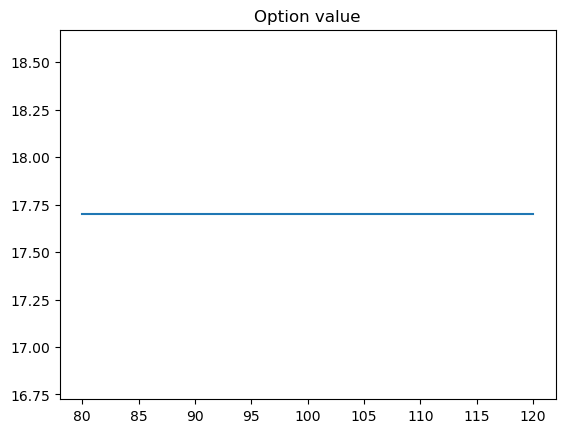

In [46]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

# Assuming 'utils' contains functions for plotting, it's likely you intended to use matplotlib's plotting capabilities directly
# If 'utils' is a custom module and 'plot' is intended to be a function within it, ensure that it's defined in the module.
# Replace the call to 'utils.plot()' with the following:

fig, ax = plt.subplots()  # Create a figure and axes using matplotlib

# define xs and ys here so they can be used in the plotting code
xs = np.linspace(80.0, 120.0, 400)
ys = []
# ... (rest of your code) ...

for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
    
# Move plotting outside the loop to plot after all data points are collected
ax.set_title('Option value')  
# utils.highlight_x_axis(ax)  # If 'highlight_x_axis' exists in 'utils', you can keep this line, otherwise, consider removing it or implementing it using matplotlib functionality
ax.plot(xs, ys)  # Use matplotlib's plot function

plt.show()  # Display the plot

In [47]:
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [48]:
print(option.NPV())

17.698227839595344


In [49]:
r.setValue(0.03)

In [50]:
print(option.NPV())

17.698227839595344


In [51]:
sigma.setValue(0.25)

In [52]:
print(option.NPV())

17.698227839595344


## Date Changes Day 6

In [14]:
# Assuming 'Parameter' is the correct class name
class Parameter:
    def setValue(self, value):
        self.value = value

# Define the variable using the correct class name
u = Parameter()
r = Parameter()
sigma = Parameter()

# Set the values
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [15]:
print(option.NPV())

3.890359427640164


In [16]:
Settings.instance().evaluationDate = Date(7, April, 2014)

In [17]:
print(option.NPV())

17.670454809119732


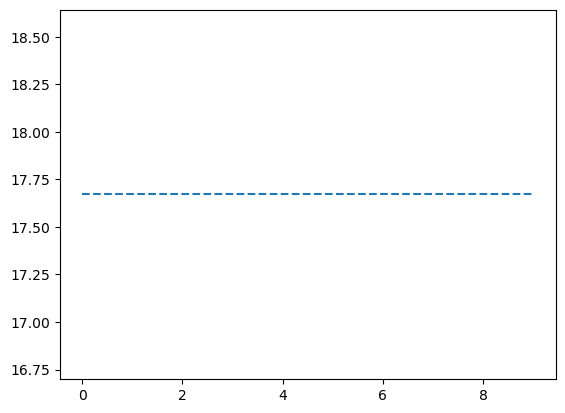

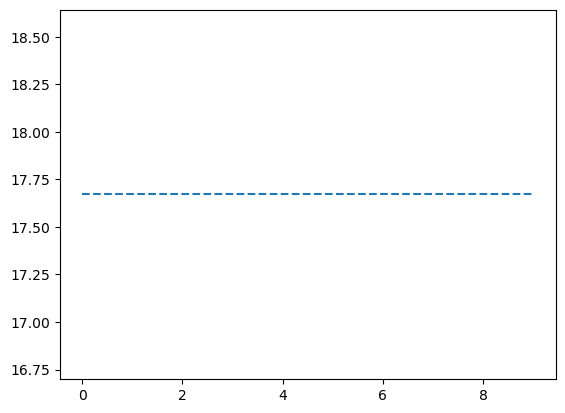

In [19]:
import matplotlib.pyplot as plt

# Create a figure object
f = plt.figure()

# Your existing plot code
ax = f.add_subplot(111)
xs = range(10)
ys = []
for x in xs:
    # Assuming option.NPV() is defined elsewhere and returns a value
    ys.append(option.NPV())
ax.plot(xs, ys, '--')

# Display the figure
display(f)


In [21]:
import QuantLib as ql

# Set the evaluation date
ql.Settings.instance().evaluationDate = ql.Date(7, ql.June, 2014)


In [22]:
print(option.NPV())

17.612621916346324


## Other Pricing methods

In [24]:
import QuantLib as ql

# Define 'today' as the current date
today = ql.Date(7, ql.June, 2014)
ql.Settings.instance().evaluationDate = today

# Set values for u, r, and sigma
u = ql.SimpleQuote(105.0)
r = ql.SimpleQuote(0.01)
sigma = ql.SimpleQuote(0.20)

# Example usage
print(f"Evaluation date set to: {today}")
print(f"u: {u.value()}, r: {r.value()}, sigma: {sigma.value()}")


Evaluation date set to: June 7th, 2014
u: 105.0, r: 0.01, sigma: 0.2


In [25]:
print(option.NPV())

17.612621916346324


In [29]:
import QuantLib as ql

# Define the risk-free rate
riskFreeRate = 0.01  # Example rate
settlementDate = ql.Date(7, ql.June, 2014)
ql.Settings.instance().evaluationDate = settlementDate

# Construct the YieldTermStructure
riskFreeCurve = ql.FlatForward(settlementDate, riskFreeRate, ql.Actual360())

# Continue with the Heston Model
model = ql.HestonModel(
    ql.HestonProcess(
        ql.YieldTermStructureHandle(riskFreeCurve),
        ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), 0.0, ql.Actual360())),
        ql.QuoteHandle(u),
        0.04, 0.1, 0.01, 0.05, -0.75
    )
)

# Example to set u, r, and sigma values
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)


In [30]:
engine = AnalyticHestonEngine(model)
option.setPricingEngine(engine)

In [31]:
print(option.NPV())

29.237516228352778


## Lazy recalculation

In [38]:
import QuantLib as ql

# Define the risk-free rate
riskFreeRate = 0.01  # Example rate
settlementDate = ql.Date(7, ql.June, 2014)
ql.Settings.instance().evaluationDate = settlementDate

# Construct the YieldTermStructure
riskFreeCurve = ql.FlatForward(settlementDate, riskFreeRate, ql.Actual360())

# Define the underlying asset and Heston process parameters
u = ql.SimpleQuote(105.0)
v0 = 0.04
kappa = 0.1
theta = 0.04
sigma = 0.2
rho = -0.75

# Create the Heston process
hestonProcess = ql.HestonProcess(
    ql.YieldTermStructureHandle(riskFreeCurve),
    ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), 0.0, ql.Actual360())),
    ql.QuoteHandle(u),
    v0, kappa, theta, sigma, rho
)

# Create the Monte Carlo Heston engine
engine = ql.MCEuropeanHestonEngine(
    hestonProcess,
    "PseudoRandom",
    timeSteps=20,
    requiredSamples=250000
)

# Assuming `option` is already defined as your European option
option.setPricingEngine(engine)

# Example calculation (make sure to define the option first)
price = option.NPV()
print(f"The option price is: {price}")



The option price is: 28.946596477234188


In [39]:
%time print(option.NPV())

28.946596477234188
CPU times: total: 0 ns
Wall time: 1.2 ms


In [40]:
%time print(option.NPV())

28.946596477234188
CPU times: total: 15.6 ms
Wall time: 1.45 ms


In [41]:
u.setValue(104.0)

In [42]:
%time print(option.NPV())

28.160422856737
CPU times: total: 1.19 s
Wall time: 1.96 s
